<a href="https://colab.research.google.com/github/demie20/Factor-Analysis/blob/main/factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 279 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=ac62638da19942da96694fcc97f59294c07720ed44943cf81174c0a6c7e49bdc
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/bfi.csv")

In [ ]:
df.columns
df.drop(['gender','education','age'],axis=1,inplace=True)
df.dropna(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

In [ ]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.199553924962, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [ ]:
kmo_model

0.8482210116350438

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

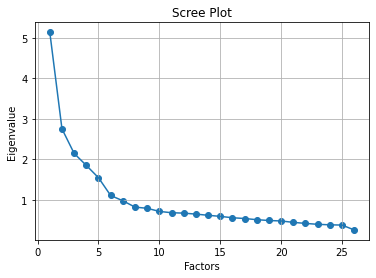

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=6, rotation="varimax")
fa.fit(df)
fa.loadings_

array([[-0.02290301, -0.03247244,  0.03316871, -0.03809335,  0.00379506,
         0.10374847],
       [ 0.09939617,  0.06047379,  0.02669442, -0.53078469, -0.12030937,
         0.16363839],
       [ 0.03176731,  0.259875  ,  0.1402256 ,  0.64656947,  0.05577021,
        -0.09704963],
       [-0.00525556,  0.40884856,  0.10953353,  0.5870038 ,  0.01618433,
         0.03914857],
       [-0.07926603,  0.25534236,  0.22930808,  0.39176034, -0.13629258,
         0.03340065],
       [-0.14364476,  0.4910488 ,  0.0856494 ,  0.45108989,  0.00911123,
         0.10588827],
       [ 0.00562295,  0.12364715,  0.54015018,  0.00422137,  0.18345833,
         0.13879816],
       [ 0.08435816,  0.10650466,  0.65249593,  0.05653766,  0.0792028 ,
         0.20858043],
       [-0.03394649,  0.0497959 ,  0.54587749,  0.10028627, -0.0123717 ,
         0.05447959],
       [ 0.23161662,  0.0089893 , -0.67278539, -0.08998026, -0.15345088,
         0.22697702],
       [ 0.29340234, -0.1436436 , -0.55970426, -0.

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=5, rotation="varimax")
fa.fit(df)
fa.loadings_

array([[-0.01924556, -0.06170286,  0.03486479, -0.01867751,  0.0143449 ],
       [ 0.1064546 ,  0.0307053 ,  0.02756748, -0.42961248, -0.07413314],
       [ 0.02869339,  0.22712712,  0.14115892,  0.62180104,  0.0641174 ],
       [ 0.0053354 ,  0.32992706,  0.11592822,  0.64285597,  0.06164725],
       [-0.06944324,  0.2092169 ,  0.23541803,  0.43124101, -0.10864741],
       [-0.12900241,  0.39769   ,  0.09790092,  0.52815947,  0.0753634 ],
       [ 0.00954751,  0.04829695,  0.54827569,  0.04119434,  0.21216878],
       [ 0.08997526,  0.01445863,  0.65030388,  0.10569283,  0.11658219],
       [-0.03024319,  0.01082522,  0.55578126,  0.11416497, -0.00481157],
       [ 0.24079401, -0.03932582, -0.63357583, -0.04146169, -0.1096952 ],
       [ 0.29433007, -0.15417946, -0.56699105, -0.04785845,  0.03126425],
       [ 0.05706633, -0.57646013,  0.01718243, -0.08965973, -0.07321838],
       [ 0.2616608 , -0.67156053, -0.12149036, -0.09678777, -0.05968008],
       [ 0.01241719,  0.53305616,  0.0

In [ ]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.73610909, 2.42804921, 2.08250384, 1.80050522, 1.54950194]),
 array([0.10523496, 0.09338651, 0.0800963 , 0.0692502 , 0.05959623]),
 array([0.10523496, 0.19862147, 0.27871777, 0.34796798, 0.4075642 ]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')